<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Do-calculus" data-toc-modified-id="The-Do-calculus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Do-calculus</a></span><ul class="toc-item"><li><span><a href="#Rule-1:-Ignoring-observations" data-toc-modified-id="Rule-1:-Ignoring-observations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rule 1: Ignoring observations</a></span></li><li><span><a href="#Rule-2:-Action/Observation-Change" data-toc-modified-id="Rule-2:-Action/Observation-Change-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Rule 2: Action/Observation Change</a></span></li><li><span><a href="#Rule-3:-Ignoring-actions" data-toc-modified-id="Rule-3:-Ignoring-actions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rule 3: Ignoring actions</a></span></li></ul></li><li><span><a href="#Concepts-required-to-understand-ID-algorithm" data-toc-modified-id="Concepts-required-to-understand-ID-algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Concepts required to understand ID algorithm</a></span><ul class="toc-item"><li><span><a href="#Theorem-2:-The-bow-arc-is-not-identifiable." data-toc-modified-id="Theorem-2:-The-bow-arc-is-not-identifiable.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Theorem 2: The bow arc is not identifiable.</a></span></li><li><span><a href="#Trees-point-toward-the-root!" data-toc-modified-id="Trees-point-toward-the-root!-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trees point toward the root!</a></span></li><li><span><a href="#$An(-Y-)$-includes-$Y$" data-toc-modified-id="$An(-Y-)$-includes-$Y$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$An( Y )$ includes $Y$</a></span></li><li><span><a href="#C-component" data-toc-modified-id="C-component-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>C-component</a></span></li><li><span><a href="#Definition-4:-(C-tree)" data-toc-modified-id="Definition-4:-(C-tree)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Definition 4: (C-tree)</a></span></li><li><span><a href="#Theorem-3" data-toc-modified-id="Theorem-3-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Theorem 3</a></span></li><li><span><a href="#Definition-5-(C-forest):" data-toc-modified-id="Definition-5-(C-forest):-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Definition 5 (C-forest):</a></span></li><li><span><a href="#Definition-6-(hedge):" data-toc-modified-id="Definition-6-(hedge):-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Definition 6 (hedge):</a></span></li><li><span><a href="#Theorem-17" data-toc-modified-id="Theorem-17-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Theorem 17</a></span></li></ul></li><li><span><a href="#A-complete-identification-algorithm." data-toc-modified-id="A-complete-identification-algorithm.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A complete identification algorithm.</a></span><ul class="toc-item"><li><span><a href="#ID-algorithm" data-toc-modified-id="ID-algorithm-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ID algorithm</a></span><ul class="toc-item"><li><span><a href="#Line-1" data-toc-modified-id="Line-1-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Line 1</a></span></li><li><span><a href="#Line-2" data-toc-modified-id="Line-2-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Line 2</a></span></li><li><span><a href="#Line-3" data-toc-modified-id="Line-3-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Line 3</a></span></li><li><span><a href="#Line-4" data-toc-modified-id="Line-4-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Line 4</a></span></li><li><span><a href="#Line-5" data-toc-modified-id="Line-5-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Line 5</a></span></li><li><span><a href="#Line-6" data-toc-modified-id="Line-6-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Line 6</a></span></li><li><span><a href="#Line-7" data-toc-modified-id="Line-7-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Line 7</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Identify-$P_x(y_1,y_2)$-from-$P(x,w_1,w_2,y_1,y_2)$" data-toc-modified-id="Identify-$P_x(y_1,y_2)$-from-$P(x,w_1,w_2,y_1,y_2)$-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Identify $P_x(y_1,y_2)$ from $P(x,w_1,w_2,y_1,y_2)$</a></span></li><li><span><a href="#Identify-$P_{x,w}(y_1,-y_2-)$-from-$P(x,w_1,w_2,y_1,y_2)$." data-toc-modified-id="Identify-$P_{x,w}(y_1,-y_2-)$-from-$P(x,w_1,w_2,y_1,y_2)$.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Identify $P_{x,w}(y_1, y_2 )$ from $P(x,w_1,w_2,y_1,y_2)$.</a></span></li><li><span><a href="#Identify-$P_{w_1,x,y_1,-y_2}(w_2)$--from-$P(x,w_1,w_2,y_1,y_2)$" data-toc-modified-id="Identify-$P_{w_1,x,y_1,-y_2}(w_2)$--from-$P(x,w_1,w_2,y_1,y_2)$-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Identify $P_{w_1,x,y_1, y_2}(w_2)$  from $P(x,w_1,w_2,y_1,y_2)$</a></span></li><li><span><a href="#Identify-$P_{x,w_1,-w_2,-y_1}-(y_2-)$-from-$P(x,w_1,w_2,y_1,y_2)$" data-toc-modified-id="Identify-$P_{x,w_1,-w_2,-y_1}-(y_2-)$-from-$P(x,w_1,w_2,y_1,y_2)$-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Identify $P_{x,w_1, w_2, y_1} (y_2 )$ from $P(x,w_1,w_2,y_1,y_2)$</a></span></li><li><span><a href="#Identify-$P_{w_2,y_2,-x,-w_1}(y_1)$-from-$P(x,w_1,w_2,y_1,y_2)$" data-toc-modified-id="Identify-$P_{w_2,y_2,-x,-w_1}(y_1)$-from-$P(x,w_1,w_2,y_1,y_2)$-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Identify $P_{w_2,y_2, x, w_1}(y_1)$ from $P(x,w_1,w_2,y_1,y_2)$</a></span></li></ul></li></ul></li><li><span><a href="#IDC-algorithm" data-toc-modified-id="IDC-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IDC algorithm</a></span></li></ul></div>

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import itertools as itt
from typing import Callable, Collection, Iterable, Set, Tuple, Union

from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from IPython.display import Latex, Markdown, set_matplotlib_formats

from y0.examples import complete_hierarchy_figure_3a_example as figure_3a
from y0.examples import figure_9a, figure_9b, figure_9c
from y0.examples import (
    line_1_example,
    line_2_example,
    line_3_example,
    line_4_example,
    line_5_example,
    line_6_example,
    line_7_example,
)
from y0.algorithm.identify import Identification, identify, Unidentifiable
from y0.algorithm.identify.id_c import idc
from y0.dsl import P, Sum, D, X, Y, Z, M, Y1, Y2, W1, W2, Product, Variable
from y0.dsl import _get_treatment_variables, _get_outcome_variables
from y0.algorithm.identify.id_std import (
    line_1,
    line_2,
    line_3,
    line_4,
    line_5,
    line_6,
    line_7,
)
from y0.graph import NxMixedGraph
from y0.dsl import Variable

In [3]:
set_matplotlib_formats("svg")

<IPython.core.display.Javascript object>

# The Do-calculus



Representing an interventional probability using 3 different notations:

* **counterfactual notation**: An intervention is represented as a subscript on the outcome variables. Note that this is strictly more expressive, as it can represent probabilistic expressions over multiple worlds, such as $P(y_x | x',y')$
* **do-notation**: an intervention is on the rhs of a conditional, wrapped in a $do()$ function: $P(y|do(x))$ 
* and **interventional distribution notation**: An intervention is represented as a subscript on the Probabilistic expression: $P_x(y)$ 

$$P(y_x) = P(y|do(x)) = P_x(y)$$


## Rule 1: Ignoring observations


$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$$P(y|do(x),{\color{blue}z},w) = P(y|do(x),w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

or in the interventional distribution notation:

$$P_x(y|{\color{blue}z},w) = P_x(y|w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

$$\begin{array}{ll}P_{do(\color{blue}{policy.intervention})}(\color{red}{hospitalization.rate}) = &  \sum_{compliance}P(compliance|\color{blue}{policy.intervention}) \\ & \sum_{\color{blue}{policy.intervention}'}P(\color{red}{hospitalization.rate}|\color{blue}{policy.intervention}', compliance)P(\color{blue}{policy.intervention}')
\end{array}$$



$$P_{do(\color{blue}{policy.intervention})}(\color{red}{hospitalization.rate})$$

$$P(y|do(x)) = \sum_zP(z|x)\sum_x'P(y|x',z)P(x')$$

$$P(y|x)$$

## Rule 2: Action/Observation Change

$$P(y|do(x), \color{red}{do(z)}, w) = P(y|do(x),\color{red} z, w)\text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$
or in interventional distribution notation:

$$P_{x,\color{red}z}(y|w) = P_x(y|\color{red}z,w) \text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$

Where $G_{\bar{X},\ubar{Z}}$  is taken to mean the graph obtained from $G$ by removing arrows pointing to $X$ and arrows leaving $Z$. 

## Rule 3: Ignoring actions

$$P(y|do(x),\color{green}{do(z)},w) = P(y|do(x),w)\text{ if }(Y\ci Z|X,W)_{G_{\bar{X}\bar{Z(W)}}}$$

or in interventional distribution notation:
$$P_{x,\color{green}{z}}(y|w) = P_x(y|w)\text{ if }(Y\ci Z|X,W)_{G_{\bar{X}\bar{Z(W)}}}$$

where $Z(W)$ is the set of $Z$ nodes not ancestors of any $W$-node in $G_{\bar{X}}$.



# Concepts required to understand ID algorithm

## Theorem 2: The bow arc is not identifiable.

We construct two causal models $M1$ and $M2$ such that $P^{M1}(x, y)=P^{M2}(x, y)$, and $P^{M1}(y|do(x))\ne P^{M2}(y|do(x))$. The two models agree on the following: 
* all 3 variables are boolean, 
* $U$ is a fair coin, 
* and $f_X(u)=u$. 

Let $⊕$ denote the exclusive not or (XNOR) function. Then the value of $Y$ is determined by the function $u⊕x$ in $M1$, while $Y$ is set to $y$ in $M2$. Then $P^{M1}(y)=P^{M2}(y)=1$, $P^{M1}( x)=P^{M2}( x)=0.5$. Therefore, $P^{M1}(X, Y)=P^{M2}(X, Y)$, while $P^{M2}(y |do(x))=1\ne P^{M1}(y|do(x))=0.5$. Note that while $P$ is non-positive, it is straightforward to modify the proof for the positive case by letting $f_Y$ functions in both models return 1 half the time, and the values outlined above half the time.


In [6]:
def M1(u: bool) -> Tuple[bool, bool]:
    """The value of Y is determined by u XNOR x"""
    x = u
    y = not (x ^ u)
    return x, y


def M2(u: bool) -> Tuple[bool, bool]:
    """The value of Y is always True"""
    x = u
    y = True | u | x
    return x, y


M1(True) == M2(True), M1(False) == M2(False)

(True, True)

$$\begin{eqnarray}
M1(u) &=&  M2(u)  \\
M1(\lnot u) &=& M2(\lnot u)\\
\end{eqnarray}$$





In [7]:
def M1x(u: bool) -> Tuple[bool, bool]:
    """X is always True but Y is determined by u XOR x"""
    x = True
    y = not (x ^ u)
    return x, y


def M2x(u: bool) -> Tuple[bool, bool]:
    """X is always True and Y is always True"""
    x = True
    y = True | u | x
    return x, y


M1x(True) == M2x(True), M1x(False) == M2x(False)

(True, False)

$$\begin{eqnarray}
M1_x(u) & = & M2_x(u) \\
M1_x(\lnot u) & \neq & M2_x(\lnot u) \\
\end{eqnarray}$$

Now, suppose $u$ is a latent variable, but you can observe the marginal probability distributions $P(x)$ and $P(y)$ from each model. 
* Can we distinguish the observational probability distributions from each model $P^{M1}(x,y)$ and $P^{M2}(x, y)$?
* Can we distinguish the interventional probability distributions from each model $P^{M1}(y | do(x))$ and $P^{M2}(y | do(x))$?

In [9]:
def Prob(
    model: Callable[[bool], Tuple[bool, bool]],
    X: Union[bool, None] = None,
    Y: Union[bool, None] = None,
    p: float = 0.5,
    samples: int = 500000,
) -> float:
    """Compute the probability of X and/or Y"""
    u = bernoulli.rvs(p, size=samples)
    joint = [model(bool(u_i)) for u_i in u]
    count = 0
    for x, y in joint:
        if X is not None and Y is not None and X == x and Y == y:
            count += 1
        elif Y is None and X == x:
            count += 1
        elif X is None and Y == y:
            count += 1
    return count / float(samples)


PM1 = r"P^{M1}"
PM2 = r"P^{M2}"
display(
    Markdown(
        f"""
$${PM1}(y) = {Prob(M1, Y=True):.1%}
\\%= {PM2}(y) = {Prob(M2, Y=True):.1%}
\\%$$
$${PM1}(x) = {Prob(M1, X=True):.1%}
\\%\\approx {PM2}(x) = {Prob(M2, X=True):.1%}
\\%$$

$${PM1}(y | do(x)) = {Prob(M1x, Y=True):.1%}
\\%\\neq {PM2}(y| do(x)) = {Prob(M2x, Y=True):.1%}
\\%$$
"""
    )
)


$$P^{M1}(y) = 100.0%
\%= P^{M2}(y) = 100.0%
\%$$
$$P^{M1}(x) = 50.0%
\%\approx P^{M2}(x) = 50.2%
\%$$

$$P^{M1}(y | do(x)) = 50.0%
\%\neq P^{M2}(y| do(x)) = 100.0%
\%$$


## Trees point toward the root!

In computer science, the root of a tree has no parents, the leaves have no children, and all nodes have at most one parent.

In the Pearlian world, the arrows point in the opposite direction, so the root of a tree has no children, the leaves have no parents, and all nodes have at most one child.   



## $An( Y )$ includes $Y$

From "[A General Identification Condition for Causal Effects](https://ftp.cs.ucla.edu/pub/stat_ser/R290-A.pdf)" by Tian and Pearl 2002:

Let  $An( S )$ denote  the  union  of  a  set $S$ and  the  set  of ancestors of the variables in $S$, and let $G_{An( S )}$ denote the subgraph of $G$ composed only of variables in $An( S )$.

## C-component
Let $G$ be a semi-Markovian graph such that a subset of its bidirected arcs forms a spanning tree over all vertices in $G.$Then $G$ is a C-component(confounded component).

Let a path composed entirely of bidirected
edges be called a bidirected path. The set of variables $V$ can
be partitioned into disjoint groups by assigning two variables
to the same group if and only if they are connected by a
bidirected path. 



![Causal graphs admitting identifiable effect $P(y|d o(\mathbf{x} ))$](images/Figure-2.png) 



How many C-components does each causal graph contain?

## Definition 4: (C-tree)

Let $G$ be a semi-Markovian graph such that $G$ is a C-component, all observable nodes have at most one child, and there is a node $Y$ such that $An(Y)_G= G$.Then $G$ is a $Y$-rooted C-tree (confounded tree).



## Theorem 3

Let $G$ be a $Y$-rooted C-tree. Then the effect of any set of nodes $\mathbf{X}$ in $G$ on $Y$ is not identifiable if $Y\not\in \mathbf{X}$.

![Causal graphs where $P(y|do(x)$ is not identifiable](images/Figure-1.png)


## Definition 5 (C-forest):

Let $G$ be a semi-Markovian graph, where $\mathbf{Y}$ is the root set. Then $G$ is a $\mathbf{Y}$-rooted C-forest(confounded forest) if $G$ is a C-component, and all observable nodes have at most one child.

![A graph hedge-less for $P(y|do(x))$ and a graph containing a hedge for $P(y|do(x))$](images/Figure-3.png)

Note that Figure  3b is not a C-forest because $W_1$ has more than one child.

## Definition 6 (hedge):

Let $\mathbf{X},\mathbf{Y}$ be disjoint sets of variables in $G$. Let $F$, $F'$ be $\mathbf{R}$-rooted C-forests such that $F'$ is a subgraph of $F$, $\mathbf{X}$ only occur in $F$, and $\mathbf{R}\in An(\mathbf{Y})_{G_{\bar{\mathbf{ X}}}}$  Then $F$ and $F'$ form a hedge for $P(\mathbf{y}|do(\mathbf{x}))$



The mental picture for a hedge is as follows. We start with original graph $G$

<img src="images/Figure-3b.png" alt="Drawing" style="width: 300px;"/>

Then we trim the graph by $do(\mathbf{x})$ so that incoming edges to $\mathbf{X}$ are removed.  This is
the C-forest $F$.


<img src="images/Figure-3b-F.png" alt="Drawing" style="width: 300px;"/>

Finally, we prune $\mathbf{X}$ entirely, leaving the C-forest $F'$.

<img src="images/Figure-3b-F-prime.png" alt="Drawing" style="width: 300px;"/>

It's easy to check that every graph in Fig. 1 contains a pair of C-forests that form a hedge for $P_x(Y)$.


Note that Figure 3a does not contain a hedge because $W_1$ is a root that is not an ancestor of $Y_1$ or $Y_2$ in the C-forests $F$ and $F'$.

<img src="images/Figure-3a-F.png" alt="Drawing" style="width: 300px;"/>

<img src="images/Figure-3a-F-prime.png" alt="Drawing" style="width: 300px;"/>

In fact, if $W_1$ was an outcome variable, then it would form a hedge and $P(y_1, y_2, w_1 | do(x))$ would not be identifiable.

## Theorem 17 

Let $F, F'$ be subgraphs of $G$ which form a hedge for $P(\mathbf{y}|do(x))$. Then $P(\mathbf{v}), G \not\models_{id} P(\mathbf{y}|do(\mathbf{x}))$. 

![Causal graphs admitting identifiable effect $P(y|do(x))$](images/Figure-2.png)

# A complete identification algorithm. 

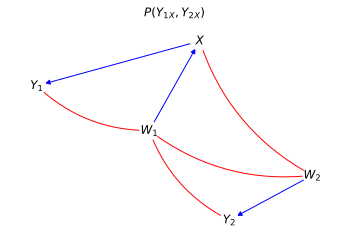

<IPython.core.display.Javascript object>

In [5]:
estimand = P(X, W1, W2, Y1, Y2)
query = P(Y1 @ X, Y2 @ X)
id_in = Identification.from_expression(query=query, graph=figure_3a.graph, estimand=estimand)
graph = id_in.graph
treatments = id_in.treatments
outcomes = id_in.outcomes
figure_3a.graph.draw(title=query._repr_latex_())

## ID algorithm

$\text{function }\mathbf{ID}\left(\mathbf y, \mathbf x, P, G\right) \\ \text{INPUT: } \mathbf{x,y}\text{ value assignments, $P$ a probability distribution, $G$ a causal diagram}. \\  \text{OUTPUT:  Expression for $P_{\mathbf x}(\mathbf y)$ in terms of $P$ or $\mathbf{FAIL}(F, F')$} $

### Line 1
1. $\text{if }{\mathbf x} =\emptyset \text{ return }\sum_{\mathbf v - \mathbf y}P({\mathbf v})$. &nbsp;&nbsp;&nbsp; 

 If no action has been taken, the effect on $\mathbf Y$ is just the marginal of the observational distribution $P(\mathbf v)$ on $\mathbf Y$. 
 

Sum[Z](P(Y, Z))

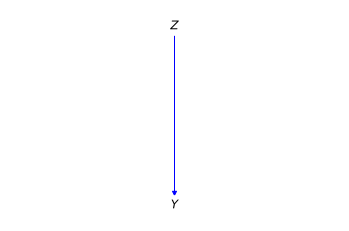

<IPython.core.display.Javascript object>

In [6]:
id_in = Identification.from_expression(
    query=P(Y), estimand=P(Y, Z), graph=NxMixedGraph.from_edges(directed=[(Z, Y)])
)
id_in.graph.draw()

line_1(id_in)

### Line 2 
2. $\text{if }\mathbf V - An(\mathbf Y)_G \neq \emptyset \\  \text{ return } \mathbf{ ID}\left(\mathbf y, \mathbf x\cap An(\mathbf Y)_G, \sum_{\mathbf V - An(Y)_G}P, G_{An(\mathbf Y)}\right)$

 If we are interested in the effect on $\mathbf Y$, it is sufficient to restrict our attention on the parts of the model ancestral to $\mathbf Y$.
 

None

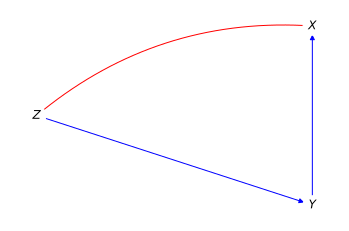

<IPython.core.display.Javascript object>

In [7]:
id_in = Identification.from_expression(
    query=P(Y @ X),
    estimand=P(X, Y, Z),
    graph=NxMixedGraph.from_edges(directed=[(Z, Y), (Y, X)], undirected=[(Z, X)]),
)
display(id_in.graph.draw())

None

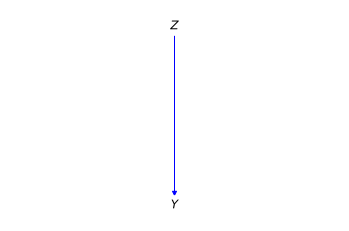

<IPython.core.display.Javascript object>

In [8]:
id_out = line_2(id_in)
display(id_out.graph.draw())

### Line 3
3. $\text{let }\mathbf W = (\mathbf V - X) - An(\mathbf Y)_{G_{\bar{\mathbf X}}}. \\ \text{if } \mathbf W \neq \emptyset, \text{ return } \mathbf{ID}\left(\mathbf y, \mathbf x\cup \mathbf w, P, G\right)$

 Forces an action on any node where such an action would have no effect on $\mathbf Y$—assuming we already acted on $\mathbf X$. Since actions remove incoming arrows, we can view line 3 as simplifying the causal graph we consider by removing certain arcs from the graph, without affecting the overall answer.
 

In [9]:
id_in = Identification.from_expression(
    query=P(Y @ X),
    estimand=P(X, Y, Z),
    graph=NxMixedGraph.from_edges(directed=[(Z, X), (X, Y)], undirected=[(Z, X)]),
)
id_in.query.treatments

{X}

<IPython.core.display.Javascript object>

In [10]:
id_out = line_3(id_in)
id_out.query.treatments

{X, Z}

<IPython.core.display.Javascript object>

### Line 4
4. $\text{if }C(G-\mathbf X) = \{S_1,\ldots S_k\} \\ \text{ return }\sum_{\mathbf v - (\mathbf y \cup \mathbf x)}\prod_i\mathbf{ID}\left(s_i, \mathbf v - s_i, P, G\right) \\ \text{if }C(G -\mathbf X) = \{S\}$

The key line of the algorithm, it decomposes the problem into a set of smaller problems using the key property of *c-component factorization* of causal models. If the entire graph is a single C-component already, further problem decomposition is impossible, and we must provide base cases. $\mathbf{ID}$ has three base cases. 

In [11]:
id_in = Identification.from_expression(
    query=P(Y @ X),
    estimand=P(M, X, Y, Z),
    graph=NxMixedGraph.from_edges(
        directed=[(X, M), (Z, X), (Z, Y), (M, Y)],
        undirected=[(Z, X), (M, Y)],
    ),
)

<IPython.core.display.Javascript object>

In [12]:
display(
    Sum[id_in.graph.nodes() - (id_in.query.treatments | id_in.query.outcomes)](
        Product([P[id_out.treatments](id_out.outcomes) for id_out in line_4(id_in)])
    )
)

Sum[M, Z](P(Z @ (X, M, Y)) * P(M @ (X, Z), Y @ (X, Z)))

<IPython.core.display.Javascript object>

### Line 5
5. &nbsp; &nbsp;&nbsp;$\text{       if }C(G) = \{G\},\\  \text{ throw }\mathbf{FAIL}\left(G,G\cap S\right)$

Fails because it finds two C-components, the graph $G$ itself, and a subgraph $S$ that does not contain any $\mathbf X$ nodes. But that is exactly one of the properties of C-forests that make up a hedge. In fact, it turns out that it is always possible to recover a hedge from these two c-components.  **FAIL** propagates through recursive calls like an exception, and returns the hedge which witnesses non-identifiability

In [13]:
id_in = Identification.from_expression(
    query=P(Y @ X),
    estimand=P(X, Y),
    graph=NxMixedGraph.from_edges(directed=[(X, Y)], undirected=[(X, Y)]),
)
try:
    line_5(id_in)
except Unidentifiable:
    print("this query fails")
else:
    raise RuntimeError("this query should have failed")

this query fails


<IPython.core.display.Javascript object>

### Line 6
6. &nbsp; &nbsp;&nbsp;$\text{ if }S\in C(G) \\ \text{ return }\sum_{S - \mathbf y}\prod_{\{i|V_i\in S\}}P\left(v_i|v_\pi^{(i-1)}\right)$

Asserts that if there are no bidirected arcs from X to the other nodes in the current subproblem under consideration, then we can replace acting on X by conditioning, and thus solve the subproblem.  $V_\pi^{(i-1)}$ is the set of nodes preceding $V_i$ in some topological ordering $\pi$ in $G$.

P(Y | X, Z)

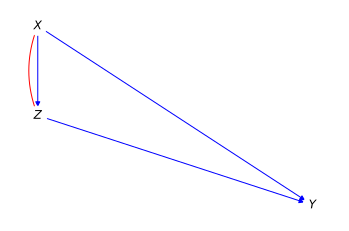

<IPython.core.display.Javascript object>

In [14]:
id_in = Identification.from_expression(
    query=P(Y @ [X, Z]),
    estimand=P(X, Y, Z),
    graph=NxMixedGraph.from_edges(
        directed=[(X, Y), (X, Z), (Z, Y)],
        undirected=[(X, Z)],
    ),
)
id_in.graph.draw()
id_out = line_6(id_in)
id_out

### Line 7
7. &nbsp; &nbsp;&nbsp;$\text{ if }(\exists S')S\subset S'\in C(G) \\ \text{ return }\mathbf{ID}\left(\mathbf y, \mathbf x\cap S', \prod_{\{i|V_i\in S'\}}P(V_i|V_\pi^{(i-1)}\cap S', V_\pi^{(i-1)} - S'), G_{S'}\right)$.

The most complex case where $\mathbf X$ is partitioned into two sets, $\mathbf W$ which contain bidirected arcs into other nodes in the subproblem, and $\mathbf Z$ which do not. In this situation, identifying $P(\mathbf y|do(\mathbf x))$ from $P(v)$ is equivalent to identifying $P(\mathbf y|do(\mathbf w))$ from $P(\mathbf V|do(\mathbf z))$, since $P(\mathbf y|do(\mathbf x)) = P(\mathbf y|do(\mathbf w), do(\mathbf z))$. But the term $P(\mathbf V|do(\mathbf z))$ is identifiable using the previous base case, so we can consider the subproblem of identifying $P(\mathbf y|do(\mathbf w))$.

None

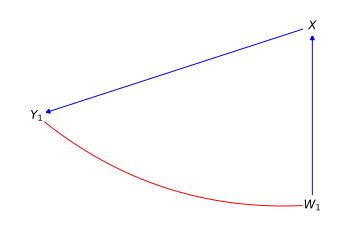

<IPython.core.display.Javascript object>

In [15]:
id_in = Identification.from_expression(
    query=P(Y1 @ [X, W1]),
    estimand=P(X, Y1, W1),
    graph=NxMixedGraph.from_edges(directed=[(X, Y1), (W1, X)], undirected=[(W1, Y1)]),
)
display(id_in.graph.draw())

P(Y1 | W1, X) * P(W1)

{Y1}

{W1}

None

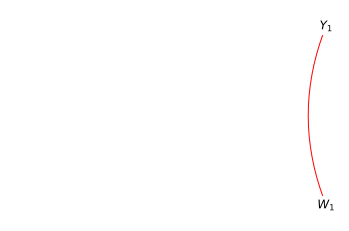

<IPython.core.display.Javascript object>

In [16]:
id_out = line_7(id_in)
display(id_out.estimand)
display(id_out.outcomes, id_out.treatments)
display(id_out.graph.draw())

## Example
We give an example of the operation of the algorithm by identifying $P_x (y_1, y_2 )$ from $P(v)$ in the graph shown in in Fig. 3 (a). 



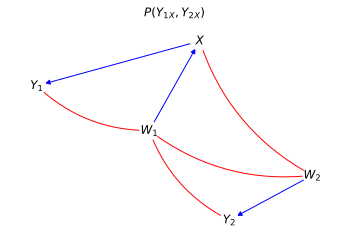

<IPython.core.display.Javascript object>

In [17]:
estimand = P(X, W1, W2, Y1, Y2)
query = P(Y1 @ X, Y2 @ X)
figure_3a.graph.draw(title=query._repr_latex_())
id_in = Identification.from_expression(query=query, graph=figure_3a.graph, estimand=estimand)
graph = id_in.graph
treatments = id_in.treatments
outcomes = id_in.outcomes

### Identify $P_x(y_1,y_2)$ from $P(x,w_1,w_2,y_1,y_2)$
Since $G = G_{An(\{Y_1, Y_2\})}$, $C(G- \{X\})=\{G\}$, and $\mathbf{W} = \{W_1\}$ , we invoke line $3$ and attempt to identify $P_{x,w}(y_1, y_2 )$. 

Since $G=G_{An(\{Y_1,Y_2\})}$ and $\mathbf{W} = \{W1\}$, we invoke line $3$ and attempt to identify  $$P({Y_1}_{X, W_1}, {Y_2}_{X, W_1})$$

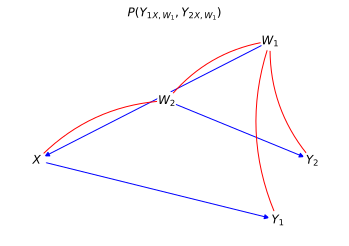

<IPython.core.display.Javascript object>

In [18]:
vertices = set(graph.nodes())
outcomes_and_ancestors = graph.ancestors_inclusive(outcomes)
not_outcomes_or_ancestors = vertices.difference(outcomes_and_ancestors)
if not not_outcomes_or_ancestors:
    intervened_graph = graph.remove_in_edges(treatments)
    no_effect_on_outcome = (vertices - treatments) - intervened_graph.ancestors_inclusive(outcomes)
    if no_effect_on_outcome:
        line_3_out = line_3(id_in)
        display(
            Markdown(
                r"Since $G=G_{An(\{Y_1,Y_2\})}$ and "
                + r"$\mathbf{W} = \{"
                + ",".join(str(w) for w in no_effect_on_outcome)
                + r"\}$, we invoke line $3$ and attempt to identify "
                f" ${line_3_out.query.expression._repr_latex_()}$"
            )
        )
    line_3_out.graph.draw(title=line_3_out.query.expression._repr_latex_())

### Identify $P_{x,w}(y_1, y_2 )$ from $P(x,w_1,w_2,y_1,y_2)$.
Now $C(G-\{X, W_1\}) = \{\{Y_1\},  \{W_2\}  \{Y_2\}\}$, so we invoke line $4$.  

Now $C(G-\{X, W_1\}) = \{\{Y_1\},  \{W_2\}, \{Y_2\}\}$, so we invoke line $4$.   

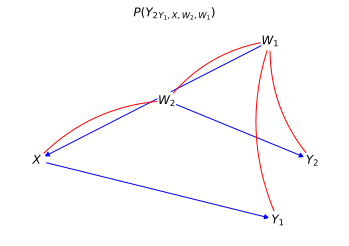

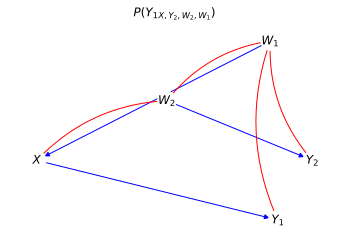

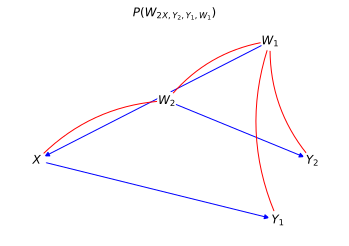

<IPython.core.display.Javascript object>

In [19]:
graph_without_treatments = line_3_out.graph.remove_nodes_from(line_3_out.treatments)
if not graph_without_treatments.is_connected():
    display(
        Markdown(
            r"Now $C(G-\{X, W_1\}) = \{\{Y_1\},  \{W_2\}, \{Y_2\}\}$, so we invoke line $4$.   "
        )
    )
    line_4_out = line_4(line_3_out)
    for i, id_out in enumerate(line_4_out):
        plt.figure(i + 1)
        id_out.graph.draw(title=id_out.query.expression._repr_latex_())


Thus the original problem reduces to identifying $\sum_{w_2}P_{x,w_1, w_2, y_2} (y_1 )P_{w_1,x,y_1, y_2}(w_2)P_{x,w_1, w_2, y_1} (y_2 )$. 

In [20]:
w2_id_in, y1_id_in, y2_id_in = sorted(line_4_out, key=lambda x: sorted(o.name for o in x.outcomes))

<IPython.core.display.Javascript object>

In [21]:
graph = line_3_out.graph
vertices = set(graph.nodes())
treatments = line_3_out.treatments
outcomes = line_3_out.outcomes

expression = Product.safe(
    sorted(
        [id_out.query.expression for id_out in line_4_out],
        key=lambda x: sorted(_get_outcome_variables(x.get_variables())),
    )
)
reduced_problem = Sum.safe(expression=expression, ranges=vertices.difference(outcomes | treatments))
display(Markdown("Thus the original problem reduces to identifying: "))
display(reduced_problem)

Thus the original problem reduces to identifying: 

Sum[W2](P(W2 @ (X, Y2, Y1, W1)) * P(Y1 @ (X, Y2, W2, W1)) * P(Y2 @ (Y1, X, W2, W1)))

<IPython.core.display.Javascript object>

### Identify $P_{w_1,x,y_1, y_2}(w_2)$  from $P(x,w_1,w_2,y_1,y_2)$

Solving for $P_{y_2, y_1, x,w_1}(w_2)$, we trigger line $2$, noting that we can ignore nodes which are not ancestors of $W_2$.  Thus, $P_{w_1,x,y_1,y_2}(w_2)=P(w_2)$.

In [22]:
w2_id_out = line_2(w2_id_in)
w2_id_out.query.expression

P(W2)

<IPython.core.display.Javascript object>

### Identify $P_{x,w_1, w_2, y_1} (y_2 )$ from $P(x,w_1,w_2,y_1,y_2)$

Similarly, we ignore non-ancestors of $Y_2$ in the third expression to obtain $P_{x,w1, w_2,y_1}(y_2)=P_{w_2}(y_2)$.

In [23]:
y2_id_out = line_2(y2_id_in)
display(y2_id_out.query.expression)
display(y2_id_out.estimand)

P(Y2 @ W2)

Sum[W1, X, Y1](P(W1, W2, X, Y1, Y2))

<IPython.core.display.Javascript object>

We conclude at line 6, to obtain $P_{w_2}(y_2)=P(y_2|w_2)$.

In [24]:
line_6(y2_id_out)

P(Y2 | W2)

<IPython.core.display.Javascript object>

### Identify $P_{w_2,y_2, x, w_1}(y_1)$ from $P(x,w_1,w_2,y_1,y_2)$

Solving for $P_{w_2,y_2, x, w_1}(y_1)$ we trigger line 2 also, obtaining $P_{x,w_1, w_2, y_2}(y_1)=P_{x,w_1}(y_1)$.

In [25]:
y1_line_2_out = line_2(y1_id_in)
display(Markdown(f"Query: {y1_line_2_out.query.expression._repr_latex_()}"))

y1_line_2_out.estimand

Query: $P({Y_1}_{X, W_1})$

Sum[W2, Y2](P(W1, W2, X, Y1, Y2))

<IPython.core.display.Javascript object>

The corresponding $G$ is shown in Figure 4(a).
![Figure 4(a)](images/Figure-4a.png)

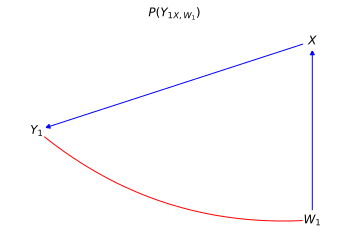

<IPython.core.display.Javascript object>

In [26]:
y1_line_2_out.graph.draw(title=y1_line_2_out.query.expression._repr_latex_())

Next we trigger line 7, reducing the problem to computing $P_{w_1}(y_1)$ from $P(y_1|x,w_1)P(w_1)$.

In [27]:
y1_line_7_out = line_7(y1_line_2_out)
display(Markdown(f"Query: {y1_line_7_out.query.expression._repr_latex_()}"))
display(y1_line_7_out.estimand)

Query: $P({Y_1}_{W_1})$

P(Y1 | W1, X) * P(W1)

<IPython.core.display.Javascript object>

The corresponding $G$ is shown in Figure 4(b).
![Figure4](images/Figure-4a.png)

In [28]:
identify(y1_line_7_out)

Sum(Sum[W1](P(Y1 | W1, X) * P(W1)))

<IPython.core.display.Javascript object>

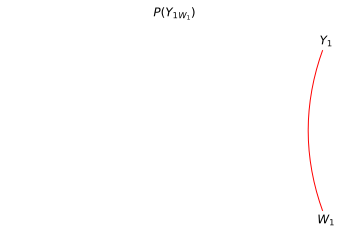

<IPython.core.display.Javascript object>

In [29]:
y1_line_7_out.graph.draw(title=y1_line_7_out.query.expression._repr_latex_())

Finally, we trigger line 2, obtaining $P_{w_1}(y_1)=\sum_{w_1}P(y_1|x,w_1)P(w_1)$.

In [30]:
y1_line_2_out = line_2(y1_line_7_out)
display(Markdown(f"Query: {y1_line_2_out.query.expression._repr_latex_()}"))
display(Markdown(r"Estimand: "))
display(y1_line_2_out.estimand)

Query: $P(Y_1)$

Estimand: 

Sum[W1](P(Y1 | W1, X) * P(W1))

<IPython.core.display.Javascript object>

In [31]:
line_1(y1_line_2_out)

Sum(Sum[W1](P(Y1 | W1, X) * P(W1)))

<IPython.core.display.Javascript object>

Putting everything together, we obtain $P_x(y_1,y_2)=\sum_{w_2}P(y_2|w_2)P(w_2)\sum_{w_1}P(y_1|x,w_1)P(w_1)$.

In [32]:
identify(id_in)

Sum[W2](P(Y2 | W2) * Sum(Sum[W1](P(Y1 | W1, X) * P(W1))) * Sum(Sum[W1, X, Y1, Y2](P(W1, W2, X, Y1, Y2))))

<IPython.core.display.Javascript object>

# IDC algorithm

$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$\text{function }\mathbf{IDC}\left(\mathbf y, \mathbf x,\mathbf z, P, G\right) \\ \text{INPUT: } \mathbf{x,y, z}\text{ value assignments, $P$ a probability distribution, $G$ a causal diagram (an I-map of P)}. \\  \text{OUTPUT:  Expression for $P_{\mathbf x}(\mathbf y|\mathbf z)$ in terms of $P$ or $\mathbf{FAIL}(F, F')$} $


1. $\text{if } (\exists Z \in \mathbf{Z})(\mathbf{Y} \ci Z | \mathbf{X}, \mathbf{Z}- \{Z\})_{G_{\bar{\mathbf{X}}\ubar{Z}}} \\
\text{return } \mathbf{IDC}(\mathbf y, \mathbf x \cup \{z\}, \mathbf z - \{z\}, P, G)\\ $
2. $\text{ else, let } P' = \mathbf{ID}(\mathbf y \cup \mathbf z, \mathbf x, P, G). \\
\text{ return } P'/\sum{\mathbf y}P'$.

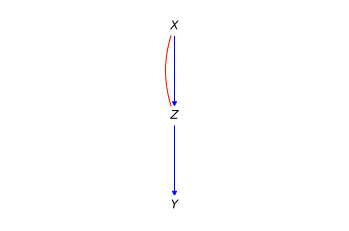

<IPython.core.display.Javascript object>

In [33]:
id_in = Identification.from_parts(
    outcomes={Y},
    treatments={X},
    conditions={Z},
    estimand=P(X, Y, Z),
    graph=NxMixedGraph.from_edges(directed=[(X, Z), (Z, Y)], undirected=[(X, Z)]),
)
id_in.graph.draw()

In [34]:
idc(id_in)

((P(Y | X, Z) / Sum[Y](P(Y | X, Z))))

<IPython.core.display.Javascript object>